train.csv: A full training dataset with the following attributes:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as:
    * 1: unreliable
    * 0: reliable

source: https://www.kaggle.com/c/fake-news/overview

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import re

# 1. Data Exploration

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# adding a new column that combines all the fields: title, author, and text
df['all'] = df['title'] + ' ' + df['author'] + ' ' + df['text']
df.head()

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
all       2515
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [9]:
# dropping rows where title = NaN
df_drop = df.dropna(subset=['all']).reset_index(drop=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 857.2+ KB


In [10]:
df_drop.head(10)

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,Obama’s Organizing for Action Partners with So...
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca..."


# 2. Preprocessing

In [11]:
# Make a new copy of the dataframe
df_clean = df_drop.copy()

# Convert all characters to lowercase - this may not be necessary if we let 
# CountVectorizer do it for us, but it doesn't take long enough to worry about.
df_clean['all'] = df_clean['all'].str.lower()

# removing possesives and contractions
df_clean['all'] = df_clean['all'].replace("’s","", regex=True)

# replacing '\n' with blank space
df_clean['all'] = df_clean['all'].replace('\n',' ', regex=True)

# removing special characters (regex)
df_clean['all'] = df_clean['all'].replace('[^A-Za-z0-9\s]+', '',regex=True)

# removing leading and trailing spaces
df_clean['all'] = df_clean['all'].str.strip()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Create the vectorizer by letting CountVectorizer handle tokenization and
# stop-words removal. Note that this will not update the original dataframe,
# but will instead create X. 
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=stopwords.words('english')).fit(df_clean['all'])

X = vectorizer.transform(df_clean['all'])

# 3. Training the Model

In [13]:
y = df_drop['label']

In [14]:
display(X.shape, y.shape)

(18285, 4507472)

(18285,)

In [15]:
# split the data set into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# applying Naive Bayes classifier to the training data
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
model = NB_classifier.fit(X_train, y_train)

In [17]:
# predicting on testing data and getting the model score
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.9478672985781991


# 4. Classification Report & Confusion Matrix

In [18]:
# dependencies
from sklearn.metrics import classification_report, confusion_matrix

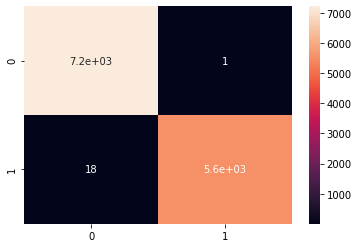

In [19]:
# confusion matrix for the Training set
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True);

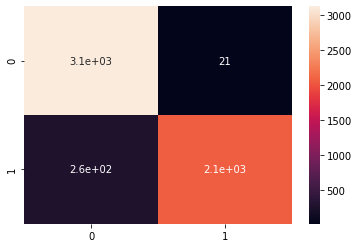

In [20]:
# confusion matrix when predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True);

In [21]:
# checking the classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3143
           1       0.99      0.89      0.94      2343

    accuracy                           0.95      5486
   macro avg       0.96      0.94      0.95      5486
weighted avg       0.95      0.95      0.95      5486



# 5. Saving the Model

In [22]:
import joblib

In [23]:
# saving the model in the current working directory
joblib_file = "News_ish.pkl"
joblib.dump(model, joblib_file)

['News_ish.pkl']

In [24]:
# loading model from file
joblib_file = "News_ish.pkl"
loaded_model = joblib.load(joblib_file)

In [25]:
# saving the vectorizer in the current working directory
joblib_vector_file = "vectorizer.pkl"
joblib.dump(vectorizer, joblib_vector_file)

['vectorizer.pkl']

In [26]:
# loading vectorizer from file
joblib_vector_file = "vectorizer.pkl"
loaded_vectorizer = joblib.load(joblib_vector_file)

In [27]:
# model score
score = loaded_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
# y_predict = loaded_model.predict(X_test)

Test score: 94.79 %


In [28]:
# testing with a new input from StarTribune news website.
input_message = '''Minnesota is reporting 45 new COVID-19 deaths and more than 9,000 coronavirus cases in an unusual release Saturday that covers two days worth of data.
The latest figures cap a week when the number of COVID-19 deaths reported by the state each day fluctuated greatly.
The Minnesota Department of Health reported 72 deaths for the 24-hour period ending at 4 p.m. on Tuesday, and a record 101 deaths reported for the 24-hour period ending at 4 p.m. Wednesday. For the 48-hour period ending Friday afternoon, the state reported fewer than 50 deaths.
Funeral home directors and medical examiners need to file reports within five days of death, according to the Health Department. It's possible they pushed to file reports before Thanksgiving, so they wouldn't have to do so on the holiday weekend, said Kris Ehresmann, the state's director for infectious diseases.
It's harder to say why the two-day totals released Saturday for new cases and completed tests were low, Ehresmann said, but the holiday could have influenced decisions about whether people sought testing. Throughout the pandemic, COVID numbers released on Mondays have tended to be lower due to reduced testing and reporting activity on weekends.
With the latest figures, Minnesota has now seen 304,023 positive cases, 16,423 hospitalizations and 3,521 deaths since the pandemic arrived here in March.
Residents of long-term care and assisted-living facilities accounted for 23 of the newly announced deaths, and 2,378 deaths since the start of the pandemic.
The state's two-day count of 9,040 new cases came on a low volume of 36,601 newly completed tests, according to the Star Tribune's coronavirus tracker.
Minnesota did not plan to update its dashboard for hospital capacity on Saturday, but the Star Tribune tracker shows 380 new admissions reported over the two-day period. The one-day figures on each of the last three Saturdays were 283, 271 and 201 new admissions.
Daily reports of new admissions typically include patients who have entered the hospital at some point over the last several days — not just on the most recent day.
Numbers released Saturday show health care workers have accounted for 22,292 positive cases — up by more than 200 cases from last week. More than 257,000 people who were infected no longer need to be isolated.
COVID-19 is a viral respiratory illness caused by a new coronavirus that surfaced late last year. People at greatest risk include those 65 and older, residents of long-term care facilities and those with underlying medical conditions.
Those health problems range from lung disease and serious heart conditions to severe obesity and diabetes. People undergoing treatment for failing kidneys also run a greater risk, as do those with cancer and other conditions where treatments suppress immune systems.
Most patients with COVID-19 don't need to be hospitalized. Most illnesses involve mild or moderate symptoms; many cases are asymptomatic.'''

In [29]:
# importing string punctuation for characters removal
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# list of characters to be removed. The app.py function includes '—'
bad_char = [i for i in string.punctuation]
print(bad_char)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [31]:
# function to preprocess new text
from nltk.corpus import stopwords
def text_prepro(message):

    message = input_message.lower()
    
    # removing possesives and contractions
    message = message.replace("'s","")
    
    # removing long dash (not in string.punctuation)
    message = message.replace("—","")
    
    # replacing '\n' with blank space
    message = message.replace('\n',' ')
    
    # removing special characters (regex)
    message_nochar = ''.join((filter(lambda i: i not in bad_char, message)))
    
    # # removing leading and trailing spaces
    message_nospace = message_nochar.strip()
    
    return message_nospace

In [32]:
# new imput preprocessing
message_preprocessed = text_prepro(input_message)

In [33]:
type(message_preprocessed)

str

In [34]:
# conver list into list type
list_test = [message_preprocessed]
list_test

['minnesota is reporting 45 new covid19 deaths and more than 9000 coronavirus cases in an unusual release saturday that covers two days worth of data the latest figures cap a week when the number of covid19 deaths reported by the state each day fluctuated greatly the minnesota department of health reported 72 deaths for the 24hour period ending at 4 pm on tuesday and a record 101 deaths reported for the 24hour period ending at 4 pm wednesday for the 48hour period ending friday afternoon the state reported fewer than 50 deaths funeral home directors and medical examiners need to file reports within five days of death according to the health department it possible they pushed to file reports before thanksgiving so they wouldnt have to do so on the holiday weekend said kris ehresmann the state director for infectious diseases it harder to say why the twoday totals released saturday for new cases and completed tests were low ehresmann said but the holiday could have influenced decisions ab

In [35]:
# new input classification
result = loaded_model.predict(loaded_vectorizer.transform(list_test))

In [36]:
print(result)

[0]


In [37]:
result

array([0], dtype=int64)